## WEALTH CREATION SYSTEM

**The Relative Strength Index (RSI) & Moving Average (MA) System**

**Tools:**

* Relative Strength Index (RSI) - 14 period
* Simple Moving Average - 20 period

**Timeframe:** Weekly

**Trading Instrument:** Best used on stocks having a large market capitalisation on that India Stock Exchange

**Entry Rule:** Go Long when RSI breaches 60 levels on the upside on the weekly chart

**Exit Rule:** Exit when price breaks a 20-period moving average on the downside

### Importing Libraries

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt

# Import function to calculate RSI
from rsi import rsi_calc

In [2]:
# Setting to view all rows in a dataframe
pd.set_option('display.max_rows', None)

### Data Pre-processing

In [3]:
# Import Weekly HDFC BANK Data from Feb 2014 to Dec 2019
data = pd.read_csv('HDFCBANK.NS.csv')

In [4]:
# View all the rows of the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,314.975006,327.250000,308.399994,323.875000,298.123718,18293960
1,2014-02-10,323.825012,326.399994,314.674988,320.899994,295.385223,12293474
2,2014-02-17,321.000000,336.125000,320.549988,332.200012,305.786804,9611524
3,2014-02-24,331.049988,341.450012,327.875000,334.799988,308.180054,9247234
4,2014-03-03,332.600006,357.450012,331.250000,355.725006,327.441315,20922766
5,2014-03-10,353.250000,374.750000,350.000000,366.075012,336.968414,34945736
6,2014-03-17,366.075012,372.399994,364.000000,366.924988,337.750793,13439268
7,2014-03-24,367.250000,380.375000,367.000000,372.475006,342.859528,32935048
8,2014-03-31,373.975006,376.774994,360.024994,362.725006,333.884796,19847562
9,2014-04-07,362.500000,374.325012,360.875000,369.075012,339.729858,17478142


In [5]:
# Drop the Adjusted Close column
data.drop(columns='Adj Close', inplace=True)

# Rename columns to lowercase for ease in typing
data.columns = 'date open high low close volume'.split()

# Convert the elements in Date column to Datetime type
data['date'] = data['date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

# Save the year in a separate column
data['year'] = data['date'].apply(lambda x: x.date().year)

# Set Datetime column as index
data.set_index('date', inplace=True)

### Add Technical Indicators

* RSI - 14 period
* Moving Average - 20 period

In [6]:
# Pass the dataframe in the function to calculate RSI for 14 periods
data = rsi_calc(data, 14)

# Calculate 20-period Simple Moving Average 
data['ma'] = data['close'].rolling(20).mean()

# Drop rows with Nan values
data.dropna(inplace=True)

### Strategy Backtest

In [7]:
# Enter when RSI breaches 60 levels on the upside on the weekly chart
data['entry'] = (data['rsi'] > 60).apply(int)

# Exit when price breaks a 20-period moving average on the downside
data['exit'] = (data['close'] < data['ma']).apply(int) * -1

In [8]:
# Replace all exit points in the entry columns with a -1
data['entry_'] = np.where(data['exit']==-1, data['exit'], data['entry'])

In [9]:
# Find difference between the current row and the previous row in the entry column and put them in a new column
data['entry_']=data['entry_'].diff()

# Replace the first Nan value with the original value in the entry column
data.ix[0,'entry_'] = data.ix[0,'entry']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


In [10]:
data

,open,high,low,close,volume,year,rsi,ma,entry,exit,entry_
date,,,,,,,,,,,
2014-06-16,415.500000,425.700012,409.674988,410.975006,12681696,2014,75.647811,369.706253,1,0,1.0
2014-06-23,412.000000,416.600006,404.325012,408.100006,22094458,2014,74.388292,373.917503,1,0,0.0
2014-06-30,409.950012,429.475006,407.500000,428.325012,16569462,2014,77.073605,379.288754,1,0,0.0
2014-07-07,429.950012,430.350006,404.399994,405.899994,19858058,2014,69.046779,382.973753,1,0,0.0
2014-07-14,407.500000,419.500000,403.575012,416.225006,16465238,2014,70.463098,387.045004,1,0,0.0
2014-07-21,420.850006,424.899994,412.625000,417.750000,19789206,2014,70.661375,390.146254,1,0,0.0
2014-07-28,419.250000,420.950012,406.000000,407.725006,13650068,2014,67.674952,392.228754,1,0,0.0
2014-08-04,409.500000,411.500000,397.500000,398.075012,14102984,2014,65.029367,393.786255,1,0,0.0
2014-08-11,400.500000,415.825012,395.700012,413.350006,15971170,2014,67.067234,395.830005,1,0,0.0


In [11]:
# Remove the unrequired cases where the new entry column is 1 but the original entry column is not
data['entry_'] = np.where((data['entry']==0) & (data['entry_']==1), 0, data['entry_'])
data['entry_'] = np.where((data['exit']==0) & (data['entry_']==-1), 0, data['entry_'])

In [12]:
# Replace all 2's with 1's which signal entries
data['entry_'] = data['entry_'].replace(2,1)

# Replace all -2's with -1's which signal exits
data['entry_'] = data['entry_'].replace(-2,-1)

In [13]:
# Update the entry column with the final entry points
data['entry'] = data['entry_'].replace(-1,0)

# Update the exit column with the final exit points
data['exit'] = data['entry_'].replace(1,0)

# Drop the newly created temporary entry column
data.drop(columns='entry_', inplace=True)

In [14]:
# Replace all 0's with Nan values in the entry column
data['entry'] = data['entry'].replace(0,np.nan)

# Replace all 0's with Nan values in the exit column
data['exit'] = data['exit'].replace(0,np.nan)

In [15]:
data

,open,high,low,close,volume,year,rsi,ma,entry,exit
date,,,,,,,,,,
2014-06-16,415.500000,425.700012,409.674988,410.975006,12681696,2014,75.647811,369.706253,1.0,NaN
2014-06-23,412.000000,416.600006,404.325012,408.100006,22094458,2014,74.388292,373.917503,NaN,NaN
2014-06-30,409.950012,429.475006,407.500000,428.325012,16569462,2014,77.073605,379.288754,NaN,NaN
2014-07-07,429.950012,430.350006,404.399994,405.899994,19858058,2014,69.046779,382.973753,NaN,NaN
2014-07-14,407.500000,419.500000,403.575012,416.225006,16465238,2014,70.463098,387.045004,NaN,NaN
2014-07-21,420.850006,424.899994,412.625000,417.750000,19789206,2014,70.661375,390.146254,NaN,NaN
2014-07-28,419.250000,420.950012,406.000000,407.725006,13650068,2014,67.674952,392.228754,NaN,NaN
2014-08-04,409.500000,411.500000,397.500000,398.075012,14102984,2014,65.029367,393.786255,NaN,NaN
2014-08-11,400.500000,415.825012,395.700012,413.350006,15971170,2014,67.067234,395.830005,NaN,NaN


In [16]:
# Dealing with edge cases - EXITS

x = data['entry exit'.split()].dropna(how='all')

# We discard the extra hits by removing the extra closes and retaining the first one alone using the diff function itself

x['diff'] = x['exit'].diff()

# Find indices where the extra closes are deleted and have 0's instead of nan and then replace these exits with nan

indices = x[x['diff'].isnull()==False].index
data.loc[indices,'exit'] = np.nan

In [17]:
# Dealing with edge cases - ENTRIES

x = data['entry exit'.split()].dropna(how='all')

# We discard the extra hits by removing the extra closes and retaining the first one alone using the diff function itself

x['diff'] = x['entry'].diff()

# Find indices where the extra closes are deleted and have 0's instead of nan and then replace these exits with nan

indices = x[x['diff'].isnull()==False].index
data.loc[indices,'entry'] = np.nan

In [18]:
# Check for any extra entry trades
if len(data['entry'].dropna()) > len(data['exit'].dropna()):
    
    # If the last row is not an open trade 
    if data['entry'].iloc[-1] != 0:
        
        # Then create an exit in that row
        data['exit'].iloc[-1] = -1
        
    # If the last row is an open trade  
    else:
        
        # Then nullify it
        data['entry'].iloc[-1] = 0
        
# Check for any extra exit trades
elif len(data['entry'].dropna()) < len(data['exit'].dropna()):
    
    data.loc[data[data['exit']==-1].index[0],'exit'] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
# Create column for all entry prices which is the close
data['entry_price'] = data[data['entry']==1]['open']

# Create column for all exit prices which is the Stop Loss that was hit, in this case the Moving Average
data['exit_price'] = data[data['exit']==-1]['ma']

In [20]:
data

,open,high,low,close,volume,year,rsi,ma,entry,exit,entry_price,exit_price
date,,,,,,,,,,,,
2014-06-16,415.500000,425.700012,409.674988,410.975006,12681696,2014,75.647811,369.706253,1.0,NaN,415.500000,NaN
2014-06-23,412.000000,416.600006,404.325012,408.100006,22094458,2014,74.388292,373.917503,NaN,NaN,NaN,NaN
2014-06-30,409.950012,429.475006,407.500000,428.325012,16569462,2014,77.073605,379.288754,NaN,NaN,NaN,NaN
2014-07-07,429.950012,430.350006,404.399994,405.899994,19858058,2014,69.046779,382.973753,NaN,NaN,NaN,NaN
2014-07-14,407.500000,419.500000,403.575012,416.225006,16465238,2014,70.463098,387.045004,NaN,NaN,NaN,NaN
2014-07-21,420.850006,424.899994,412.625000,417.750000,19789206,2014,70.661375,390.146254,NaN,NaN,NaN,NaN
2014-07-28,419.250000,420.950012,406.000000,407.725006,13650068,2014,67.674952,392.228754,NaN,NaN,NaN,NaN
2014-08-04,409.500000,411.500000,397.500000,398.075012,14102984,2014,65.029367,393.786255,NaN,NaN,NaN,NaN
2014-08-11,400.500000,415.825012,395.700012,413.350006,15971170,2014,67.067234,395.830005,NaN,NaN,NaN,NaN


In [21]:
# Save all non-nan values of entry prices in a series
entry_prices = data['entry_price'].dropna()

# Save all non-nan values of exit prices in a series
exit_prices = data['exit_price'].dropna()

In [22]:
# Assign the exit indices to the entry price indices to calculate PnL
entry_prices.index = exit_prices.index

In [23]:
# Create PnL column by subtracting the entry prices from the exit prices
data['pnl'] = exit_prices - entry_prices

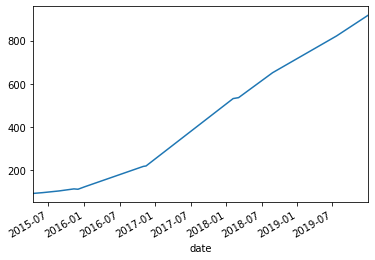

In [24]:
# Plot for cumulative profits
data.dropna(axis=0, subset=['pnl'])['pnl'].cumsum().plot()

In [25]:
# Show all PnL values
data.dropna(axis=0, subset=['pnl'])

,open,high,low,close,volume,year,rsi,ma,entry,exit,entry_price,exit_price,pnl
date,,,,,,,,,,,,,
2015-04-13,520.000000,524.349976,508.024994,509.125000,9558182,2015,66.704234,509.140005,NaN,-1.0,NaN,509.140005,93.640005
2015-06-01,524.474976,528.000000,497.500000,505.875000,13351804,2015,64.529774,517.822507,NaN,-1.0,NaN,517.822507,3.622495
2015-08-24,522.349976,522.349976,502.850006,513.974976,26016908,2015,62.975217,523.836255,NaN,-1.0,NaN,523.836255,7.786267
2015-11-09,529.000000,534.825012,520.500000,526.025024,9886020,2015,62.134580,537.033757,NaN,-1.0,NaN,537.033757,9.533757
2015-11-30,539.599976,546.349976,528.000000,529.450012,9686466,2015,61.995621,535.373756,NaN,-1.0,NaN,535.373756,-1.626244
2016-01-04,542.000000,542.000000,524.849976,531.174988,11028864,2016,61.548099,532.103752,NaN,-1.0,NaN,532.103752,11.603752
2016-10-31,629.525024,631.924988,615.875000,621.849976,10963790,2016,61.546956,624.221243,NaN,-1.0,NaN,624.221243,94.071219
2016-11-14,637.900024,644.500000,604.599976,605.700012,16427896,2016,60.527446,627.991245,NaN,-1.0,NaN,627.991245,1.991245
2018-02-05,959.000000,967.625000,918.150024,924.750000,19310978,2018,64.393766,929.758749,NaN,-1.0,NaN,929.758749,311.758749


In [26]:
# Print total number of trades made
len(data.dropna(axis=0, subset=['pnl']))

13

In [27]:
# Print the final PnL
data['pnl'].sum()

917.0552483000013

In [33]:
# Calculate annualised return
annualised_return = (data['pnl'].sum()) * 365 / (data.index[-1] - data.index[0]).days

# Calculate Maximum Drawdown
running_max = np.maximum.accumulate(data['pnl'].dropna())
running_max[running_max < 1] = 1
drawdown = (data['pnl'].dropna())/running_max - 1
mdd = min(drawdown)

# Calculate Calmar Ratio
calmar = annualised_return / abs(mdd)

# Calculate Sharpe Ratio
annual_pnl = data.groupby(['year']).sum()
var  = sum(pow(apl-annualised_return,2) for apl in annual_pnl['pnl']) / len(annual_pnl)  # variance
ann_std  = math.sqrt(var)
sharpe = annualised_return / ann_std

In [34]:
annualised_return

165.45979517029187

In [35]:
mdd

-1.017366975717838

In [36]:
calmar

162.6353116617984

In [37]:
sharpe

1.0774790505888965